# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

Text(0, 0.5, 'Number of Students')

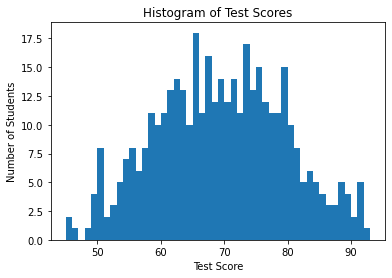

In [3]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

Text(0.5, 1.0, 'Histogram of NumPy Normal Distribution')

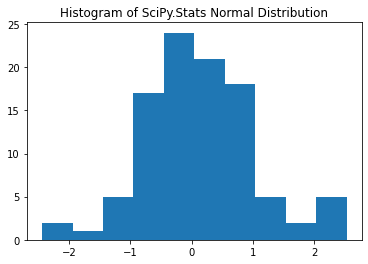

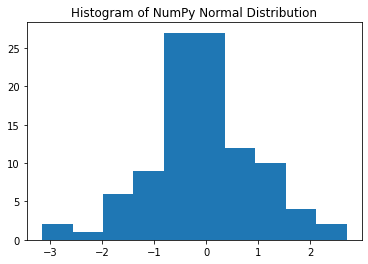

In [4]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
#np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
#np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

Text(0.5, 1.0, 'Histogram of 10000 Rolls with .rvs() Method in the Stats Module')

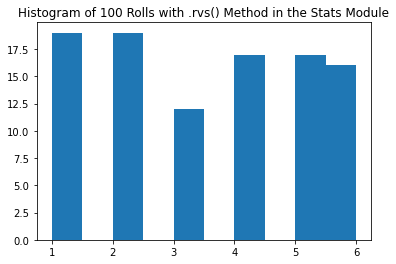

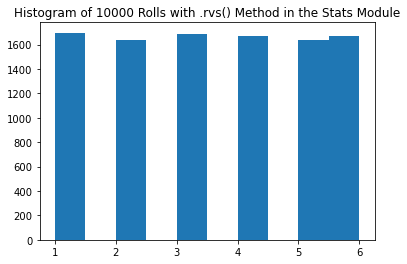

In [5]:
# Problem 1
# Author: Xu Ke
# Date: 2021.09.24

# Copy this part from Lab1 Problem2
p = (1./6,1./6,1./6,1./6,1./6,1./6) #Vector of probabilities (as a tuple)
c = (1,2,3,4,5,6) #Vector of values (as a tuple)
Xcstm = st.rv_discrete(values=(c,p)) #Creates an instance (aka object) of rv_discrete from our vectors

# Subproblem 1

one = Xcstm.rvs(size = 100)
plt.hist(one); # Histogram of 100 Rolls
plt.title('Histogram of 100 Rolls with .rvs() Method in the Stats Module')

plt.figure()
# Subproblem 2

two = Xcstm.rvs(size = 10000)
plt.hist(two); # Histogram of 10000 Rolls
plt.title('Histogram of 10000 Rolls with .rvs() Method in the Stats Module')

__Answer:__ (Your answer here) In the first case when 100 rolls, the result doesn't fit my expectation (all number from 1 to 6 should be equal likely, i.e. same in probability) well while in the second case when 10000 rolls, the result fits my expectation (all number from 1 to 6 should be equal likely, i.e. same in probability) much more. Maybe the reason behind this difference is that with larger number of samples, the result will be less influenced by one experiment and thus being more similar to the ideal theoretical distribution.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

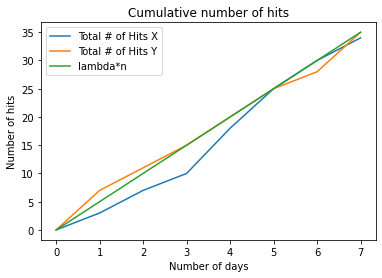

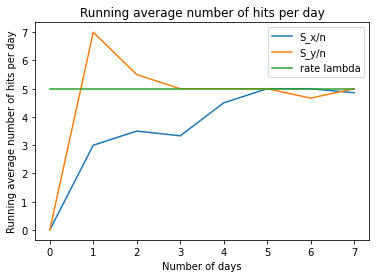

In [6]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

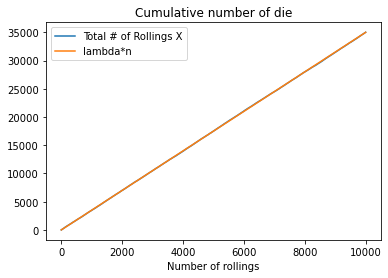

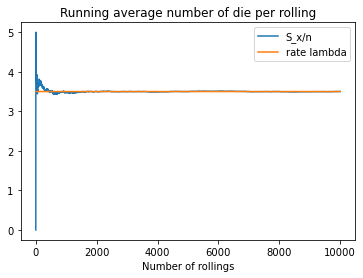

In [7]:
# Problem 2 Part 1
# Author: Xu Ke
# Date: 2021.09.24
# Modified according to the example above

lamb = 3.5 # lambda = (1+2+3+4+5+6)/6
N = 10000 # Numbers of rolls
x = [Xcstm.rvs()]    #Gets the number of hits on the first day and stores it in a vector
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times

for n in range(1,N+1): #Simulates over N days
    x.append(Xcstm.rvs()) #Appends the number of hits of the next day to the vector
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Rollings X') #Plots the total number of hits
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of die')
plt.xlabel('Number of rollings')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of die per rolling')
plt.xlabel('Number of rollings')
plt.legend()

__Answer:__ (Your answer here) With a relavant sufficient large number, the rough approximation of the sum will be n*lambda and the rough approximation of the average will be lambda.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

__Problem 3 Part 1 Analysis:__ 
With the knowledge of permutation and combination, it is clear that the number of $total case$ is $\tbinom{52}{5}$, including four subcases, namely case of __Two Pair__ ($tp$), __Three of a Kind__ ($tk$), __FullHouse__ ($fh$) and __Flush__ ($fl$) which will be discussed one by one in the following part:

For case of __Two Pair__: 
$tp = \tbinom{13}{2}\tbinom{4}{2}\tbinom{4}{2}\tbinom{44}{1}$
$P(tp) = \frac{tp}{totalcase}$

For case of __Three of a Kind__:
$tk = \tbinom{13}{1}\tbinom{4}{3}\tbinom{12}{2}\tbinom{4}{1}\tbinom{4}{1}$
$P(tk) = \frac{tk}{totalcase}$

For case of __FullHouse__:
$fh = \tbinom{13}{1}\tbinom{4}{2}\tbinom{12}{1}\tbinom{4}{3}$
$P(fh) = \frac{fh}{totalcase}$

For case of __Flush__:
$fl = \tbinom{4}{1}\tbinom{13}{5}$
$P(fl) = \frac{fl}{totalcase}$

In [8]:
# Problem 3 Part 1 Code:
# Author: Xu Ke
# Date: 2021.09.24

tp = sp.special.comb(13,2)*sp.special.comb(4,2)*sp.special.comb(4,2)*sp.special.comb(44,1)/sp.special.comb(52,5)
tk = sp.special.comb(13,1)*sp.special.comb(4,3)*sp.special.comb(12,2)*sp.special.comb(4,1)*sp.special.comb(4,1)/sp.special.comb(52,5)
fh = sp.special.comb(13,1)*sp.special.comb(4,2)*sp.special.comb(12,1)*sp.special.comb(4,3)/sp.special.comb(52,5)
fl = sp.special.comb(4,1)*sp.special.comb(13,5)/sp.special.comb(52,5)

print('Calculation Result:\nFor case of Two Pair P(tp)=',tp,'\nFor case of Three of a Kind P(tk)=',tk,'\nFor case of FullHouse P(fh)=',fh,'\nFor case of Flush P(fl)=',fl)


Calculation Result:
For case of Two Pair P(tp)= 0.0475390156062425 
For case of Three of a Kind P(tk)= 0.02112845138055222 
For case of FullHouse P(fh)= 0.0014405762304921968 
For case of Flush P(fl)= 0.0019807923169267707


In [ ]:
# Problem 3 Part 2 Code:
# Author: Xu Ke
# Date: 2021.09.24

# Import Needed Package
import random as rd
import time

# Initialize New Variable
two = 0
thr = 0
ful = 0
flu = 0

for i in range(1000000): # Do The Experiment for 1000000 Times
    temp = np.zeros((4,13)) # Initialize a Temp for Storage 4*13
    m = rd.sample(range(0,52),5) # Randomly Create Samples
    for i in range(5):
        coordinate = ( m[i]//13 , m[i]%13 )
        temp[coordinate[0]][coordinate[1]]=1
    row = np.sum(temp, axis=0)
    col = np.sum(temp, axis=1)
    if 5 in col: # Flush
        flu += 1
    if 3 in row and list(row).count(1) == 2: # Three of a Kind
        thr += 1
    if list(row).count(2) == 2: # Two Pair
        two += 1
    if 3 in row and 2 in row: # FullHouse
        ful += 1
        
print('Experiment Result:\nFor case of Two Pair P(tp)=',two/1000000,'\nFor case of Three of a Kind P(tk)=',thr/1000000,'\nFor case of FullHouse P(fh)=',ful/1000000,'\nFor case of Flush P(fl)=',flu/1000000)
print('The running time is %s Seconds'%(time.process_time()))

__Answer:__ (Your answer here) The probabilities I get from experiment matches the theory relatively well. Based on my code, the experimental probability of __Two Pair__ is 0.047558, of __Three of a Kind__ is 0.021212, of __FullHouse__ is 0.001458, of __Flush__ is 0.001952. Theoretically, the probability of them is 0.0475390156062425, 0.02112845138055222, 0.0014405762304921968, 0.0019807923169267707 respectively.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

In the simulation, you can simulate every step that happens in the actual game and exactly as it happens, even for very trivial steps. You can also clever-guess some parts and skip some trivial steps; if you do that, make sure you briefly reason about why you do so in comments, so that the graders know that you understand what actually happens in the game. There is no timing requirement for this problem.  

__Answer of Part 1:__ (Your answer here) Intuitively, I have no preference of this two choices and just choose one randomly because I think whether switching or keep, I have the same probability of 0.5 to win.

In [ ]:
# Problem 4 Part 2
# Author: Xu Ke
# Date: 2021.09.24

stick_count = 0 # Initialize counter
for i in range(1000000): # Repeat 1,000,000 times
    p = rd.randint(0,2) # Do the choice
    if p == 0:
        stick_count += 1 # Count if success
print("The possibility of getting the grand prize is ",stick_count/1000001)

In [ ]:
# Problem 4 Part 3
# Author: Xu Ke
# Date: 2021.09.24

switch_count = 0 # Initialize counter
for i in range(1000000): # Repeat 1,000,000 times
    p = rd.randint(0,2) # Do the choice
    if p != 0:
        switch_count += 1 # Count if success
print("The possibility of getting the grand prize is ",switch_count/1000001)

__Answer of Part 4:__ (Your answer here) I will switch doors because from 1,000,000 times experiments, I find that if I switch I will have the twice (i.e.$\frac{2}{3}$) the probability to win than sticking my choice (i.e.$\frac{1}{3}$)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 